# Gastro-Intestinal Disease detection

---



## Loading the data from Kaggle

In [1]:
from google.colab import files

# Uploading the kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Moving the uploaded kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Downloading the dataset from kaggle
!kaggle datasets download -d meetnagadia/kvasir-dataset

100% 1.15G/1.15G [01:01<00:00, 22.2MB/s]
100% 1.15G/1.15G [01:01<00:00, 20.1MB/s]


In [4]:
# Unzipping the downloaded dataset
!unzip -q kvasir-dataset.zip -d kvasir-dataset

In [5]:
# Importing the required libraries
import os
import glob
import numpy as np
import pandas as pd

In [6]:
# Specifying the path to the dataset directory
dataset_dir = "/content/kvasir-dataset/kvasir-dataset"

In [7]:
# Defining a function to get dataset categories and the number of files in each category
def get_data_categories(dataset_dir):
    categories = []
    for folder_name in os.listdir(dataset_dir):
        if os.path.isdir(os.path.join(dataset_dir, folder_name)):
            nbr_files = len(glob.glob(os.path.join(dataset_dir, folder_name, "*.jpg")))
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

In [8]:
# Getting categories and number of files
categories, nbr_files = get_data_categories(dataset_dir)

In [10]:
# Creating the DataFrame
df = pd.DataFrame({"category": categories, "number_of_files": nbr_files})
print("Number of categories: ", len(categories))
df

Number of categories:  8


,category,number_of_files
0,dyed-lifted-polyps,500
1,dyed-resection-margins,500
2,esophagitis,500
3,normal-cecum,500
4,normal-pylorus,500
5,normal-z-line,500
6,polyps,500
7,ulcerative-colitis,500


## Data Preprocessing

In [15]:
# Creating the set of features X as well as the labels y
import cv2

def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                print(f"Loading image: {img_path}")

                img_array = cv2.imread(img_path)
                img_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(img_resize_rgb)
                y.append(class_num)

            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 100, 100
X, y = create_dataset(dataset_dir, categories, img_wid, img_high)

print(f"X: {X.shape}")
print(f"y: {y.shape}")

Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/b17c4984-2819-4281-893e-850c3117261e.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/5d421dba-a4c3-4bb9-935d-a10eba1c7a8a.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/8db29cc0-8f98-4986-b115-9901b33f3114.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/24210ceb-3a29-4386-a501-812f337ef6b6.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/7432a33e-c4db-48b3-a1fb-0ebb817a3c79.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/b5e24486-2569-4192-9504-c7423d69dbe4.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/98088dcb-66d7-4d6b-bcc4-9d3284d53e7f.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/fda47e17-cfb3-4fc1-8d67-c423b8c2d192.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/02c10865-9d23-4

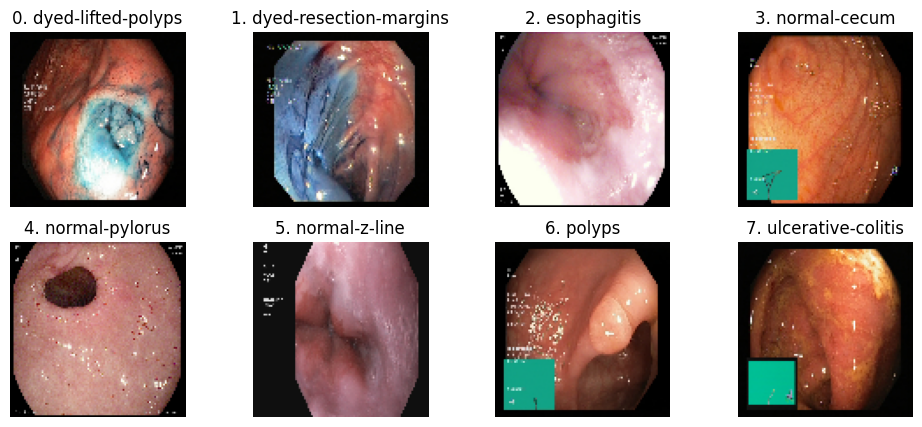

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Displaying random images for each category
plt.figure(figsize=(12, 5))
for i, category in enumerate(categories):
    plt.subplot(2, 4, i + 1)

    # Getting indices of images for the current category
    category_indices = np.where(y == i)[0]

    # Randomly selecting an image index for the current category
    idx = np.random.choice(category_indices)

    # Displaying the image
    plt.imshow(X[idx][:, :, ::-1])
    plt.title(f"{i}. {category}")
    plt.axis("off")

plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Converting y to scaler format
Y = np.reshape(y, (len(y), 1))

# Splitting dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (3200, 100, 100, 3)
y_train: (3200, 1)
X_test: (800, 100, 100, 3)
y_test: (800, 1)


In [20]:
# Creating the validation set
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
x_test = X_test

# Dimensions of the dataset
print(f"x_train:{x_train.shape},  y_train:{y_train.shape}")
print(f"x_train:{x_val.shape},  y_train:{y_val.shape}")
print(f"x_test:{x_test.shape},  y_test:{y_test.shape}")

x_train:(2240, 100, 100, 3),  y_train:(2240, 1)
x_train:(960, 100, 100, 3),  y_train:(960, 1)
x_test:(800, 100, 100, 3),  y_test:(800, 1)


In [21]:
from tensorflow.keras.utils import to_categorical

# OneHot Encoding the Prediction
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Verifying the dimensions after one hot encoding
print(f"x_train:{x_train.shape},  y_train:{y_train.shape}")
print(f"x_train:{x_val.shape},  y_train:{y_val.shape}")
print(f"x_train:{x_test.shape},  y_train:{y_test.shape}")

x_train:(2240, 100, 100, 3),  y_train:(2240, 8)
x_train:(960, 100, 100, 3),  y_train:(960, 8)
x_train:(800, 100, 100, 3),  y_train:(800, 8)


In [23]:
from keras.preprocessing.image import ImageDataGenerator

# Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

# Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

Now we can focus on building a suitable model for disease detection.